<a href="https://colab.research.google.com/github/Manishabalot/Deeploycv/blob/main/Assignment1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()

# Read uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Resize image for consistent results
image = cv2.resize(image, (300, 300))
print("Image successfully loaded and resized.")


Saving flower.jpg to flower (1).jpg
Saving flower1.jpg to flower1 (1).jpg
Image successfully loaded and resized.


Functions for Image Processing
a. Greyscale Conversion

In [8]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


b. Thresholding
1. Binary Thresholding (Black and White):

In [9]:
def binary_threshold(image, threshold=127):
    gray = grayscale(image)
    _, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    return binary


2. 16-Grey Colors: Divide the grayscale range into 8 levels:


In [10]:
def multi_threshold(image):
    gray = grayscale(image)
    output = (gray // 32) * 32  # Divides 0-255 into 8 regions (each of 32 values)
    return output


c. Sobel Filter and Canny Edge Detection
1. Sobel Filter:

In [11]:
def sobel_filter(image):
    gray = grayscale(image)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    return np.uint8(sobel_combined)


2. Canny Edge Detection:

In [12]:
def canny_edge(image, threshold1=50, threshold2=150):
    gray = grayscale(image)
    return cv2.Canny(gray, threshold1, threshold2)


d. Gaussian Filtering to Remove Noise

In [13]:
def gaussian_filter(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)


e. Sharpen the Image
  (Apply sharpening after Gaussian blur using a kernel):

In [14]:
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)


f. Convert RGB to BGR

In [15]:
def convert_rgb_to_bgr(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


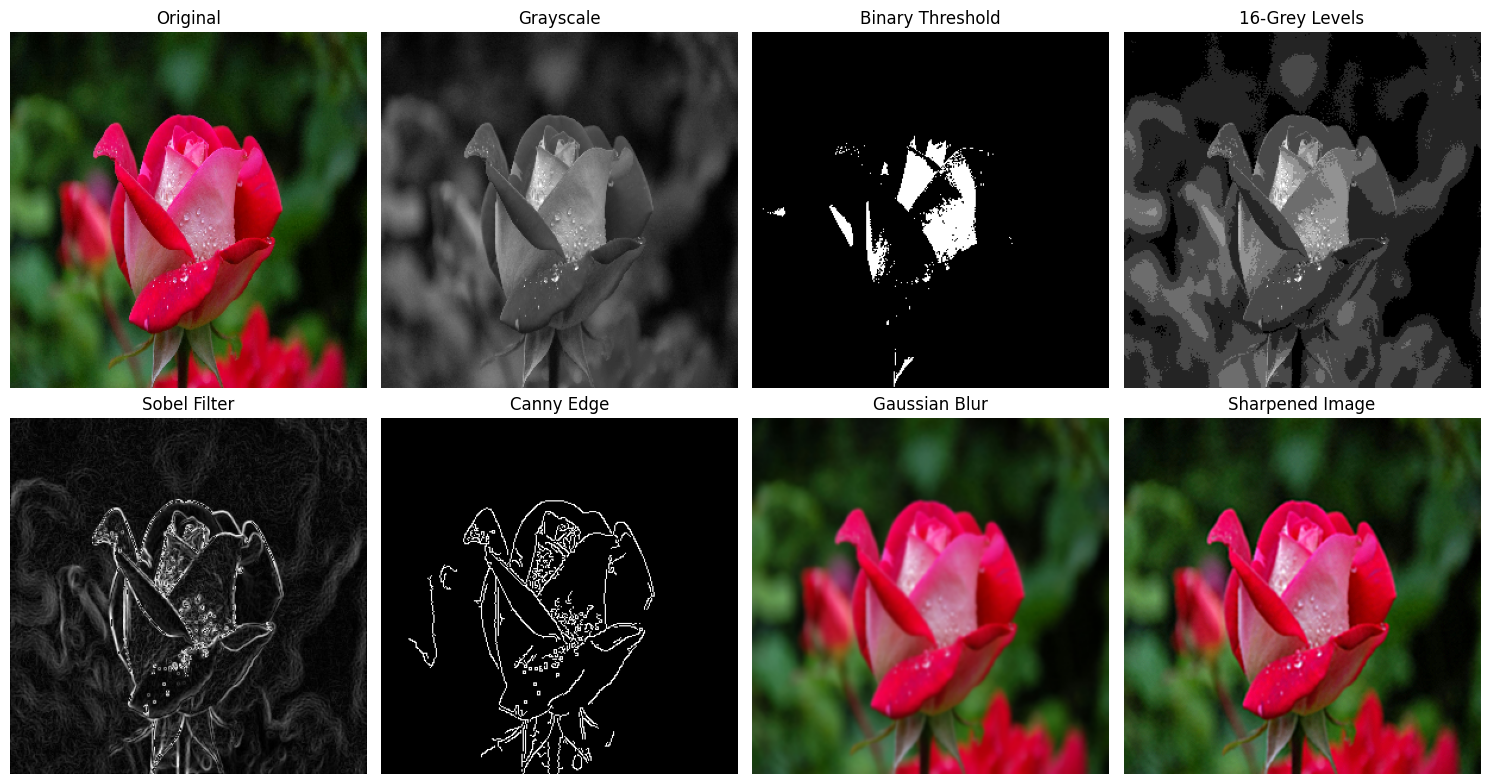

In [16]:
def display_results(image):
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.ravel()

    # Original Image
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original")

    # Grey Scaling
    axes[1].imshow(grayscale(image), cmap='gray')
    axes[1].set_title("Grayscale")

    # Binary Thresholding
    axes[2].imshow(binary_threshold(image), cmap='gray')
    axes[2].set_title("Binary Threshold")

    # 16-Grey Level
    axes[3].imshow(multi_threshold(image), cmap='gray')
    axes[3].set_title("16-Grey Levels")

    # Sobel Filter
    axes[4].imshow(sobel_filter(image), cmap='gray')
    axes[4].set_title("Sobel Filter")

    # Canny Edge Detector
    axes[5].imshow(canny_edge(image), cmap='gray')
    axes[5].set_title("Canny Edge")

    # Gaussian Filter
    blurred = gaussian_filter(image)
    axes[6].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
    axes[6].set_title("Gaussian Blur")

    # Sharpened Image
    sharpened = sharpen_image(blurred)
    axes[7].imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
    axes[7].set_title("Sharpened Image")

    for ax in axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Run the display function
display_results(image)
